M508 Individual Final Project

Fake News Detection

Student ID: GH1019250

# Introduction

Especially with the increase in number of active online users in the internet, fake news started to became so common. There are a lot of websites, and news websites which can carry wrong information through the society. In some cases this fake news can even cause death of a person. 

Our task is to create a NLP pipeline, which will use the fake and true news to train and give us prediction results. Our dataset has the following features:\
-The dataset is divided into two parts which are fake and true news.\
-It has the following features in text format: Title, Text and Subject.\
-It has date and time feature of the news.

Using the given text data, we are going to create a Convolutional Neural Network(CNN) model and train it. We are going to do some experiments to find the best model.

Note: You can reach the dataset from the following link: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

# Building the Pipeline

## Loading Libraries

To start our task we should import our libraries and functions that we are going to use building our pipeline. Besides libraries like pandas, numpy, seaborn, we are going to use some task related libraries such as NLTK and tensorflow to creat our NLP CNN model.

In [90]:
import pandas as pd
import numpy as np
import nltk
import string
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

We are connecting our server to google drive account to reach the csv files.

In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Our datasets are seperated as True and Fake news. We are going to import our csv files seperately, and will merge them later on. 

In [15]:
df_true = pd.read_csv('/content/drive/My Drive/Colab Notebooks/True.csv')
df_fake = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake.csv')
print(f'Shape of the true dataset is: {df_true.shape} \n\
Shape of the fake dataset is: {df_fake.shape}')

Shape of the true dataset is: (21417, 4) 
Shape of the fake dataset is: (23481, 4)


We are going to check both datasets with a general look to get an idea about the shape of our data.

In [16]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Our both fake and true news datasets has the same construction. We can merge them together. Before merging them, we have to label them to keep track of the target. For this purpose, we are going to create label feature in both datasets, filling true news with 1 and fake news with 0.

In [18]:
df_true['label'] = 1
df_fake['label'] = 0

Now we are going to concatenate our true and fake datasets, to have a single dataset.

In [87]:
df = pd.concat([df_true, df_fake])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Target Label

In our task target label is 1 and 0, which represents true and fake news respectively. We have the target label column in our dataset called as label. 

Below you can find a graphical representation of the occurences of both labels.

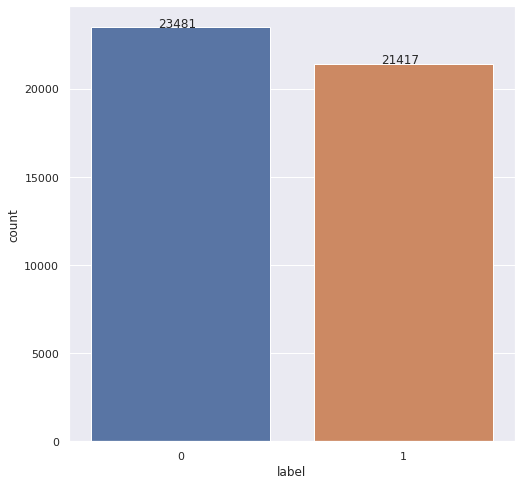

In [20]:
sns.set_theme(style="dark")
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(x="label", data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))

Our datasets are balanced enough. We don't need to over or undersampling. 

In this step, we are going to check for null values in our dataset.

In [21]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


We don't have any null values. Now we are going to change our date from object type to date-time format. For this purpose, we are going to filter some of the unnecessary words from our date column. We are going to remove the patterns like https, and name of the month to keep all date values in a single format.

In [22]:
pattern = "http"
filter1 = df['date'].str.contains(pattern)

df = df[~filter1]

In [23]:
pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['date'].str.contains(pattern)

df = df[filter2]

After filtering them, we are going to turn the format into datetime format of pandas library.

In [24]:
df['date'] = pd.to_datetime(df['date'])

We are going to use date as index of our dataframe.

In [25]:
df = df.set_index(['date']).sort_values(['date'])
df

,title,text,subject,label
date,,,,
2015-03-31,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,0
2015-03-31,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,0
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,0
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,0
2015-03-31,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,0
...,...,...,...,...
2018-02-18,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,0
2018-02-18,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,0
2018-02-19,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,0


Now in this step, we are going to merge the text information into one feature for further process. We are merging them in a new column called news, and dropping the old columns, which are title, text and subject.

In [26]:
df['news'] = df['title'] + ' ' + df['text'] + ' ' + df['subject']
df = df.drop(['title', 'text', 'subject'], axis=1)
df

,label,news
date,,
2015-03-31,0,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...
2015-03-31,0,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...
2015-03-31,0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...
2015-03-31,0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...
2015-03-31,0,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...
...,...,...
2018-02-18,0,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...
2018-02-18,0,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...
2018-02-19,0,WATCH: SNOWFLAKES ASKED Communist Party Platfo...


Now our dataframe has the columns, which are label and news. 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44888 entries, 2015-03-31 to 2018-02-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   44888 non-null  int64 
 1   news    44888 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


The datatype of news is object. We are going to change it to string, before next step.

In [28]:
df['news'] = df['news'].astype('string')

# Cleaning the Text

In NLP tasks, one of the most crucial step is cleaning the text. To clean the text, there are a lot of different methods. We are going to use some help of some libraries such as, string and stopwords. 

To start cleaning our text, we start with lowering all of the cases. Then we are going to check for punctuations. After removing punctuations, we have seen that some special characters such as “, ” and ’ are not in the string library. Then we are checking for any digits. And lastly, we are removing multiple whitespaces.

In [29]:
def clean_text(text):
    cleaned_text = text.lower()
    cleaned_text = "".join([i for i in cleaned_text if i not in string.punctuation])
    cleaned_text = re.sub('[\\“\\’\\”]', ' ', cleaned_text)
    cleaned_text = re.sub("\d+", ' ', cleaned_text)
    cleaned_text = re.sub("\\s+", ' ', cleaned_text)
    
    return cleaned_text

We are using the function created above to clean our text from the explained items.

In [30]:
df['news'] = df['news'].apply(lambda x: clean_text(x))
print(df['news'][0])

watch dirty harry reid on his lie about romney s taxes  he didn t win did he  in case you missed it sen harry reid rnv who announced last week that he will retire after his current term expires in early said he does not regret taking to the senate floor in to accuse thengop presidential nominee mitt romney of not paying his taxes no i don t regret that at all he told cnn s dana bash the koch brothers no one would help me they were afraid the koch brothers would go after them so i did it on my own bash said some viewed the charge as mccarthyite but reid didn t buy that explanation he shrugged saying they can call it whatever they want romney didn t win did he reid said somewhat amusingly politics


We can see that, all the punctuation and other items such as doubles spaces and digits are removed from our text. 

Now we are going to remove stopwords which are common words used in english which does not carry information our task. This words can be exampled as on, his, he, in etc. We are going to check every word in our dataset, and remove the stopwords inside our text. 

In [31]:
def remove_stopwords (text):
    stopwords_removal = [word for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    stopwords_removal = ' '.join(stopwords_removal)
    return stopwords_removal

We are going to apply the function that we have created to our text data to remove stopwords.

In [39]:
df['news'] = df['news'].apply(lambda x: remove_stopwords(x))
print(df['news'][0])

watch dirty harry reid lie romney taxes win case missed sen harry reid rnv announced last week retire current term expires early said regret taking senate floor accuse thengop presidential nominee mitt romney paying taxes regret told cnn dana bash koch brothers one would help afraid koch brothers would go bash said viewed charge mccarthyite reid buy explanation shrugged saying call whatever want romney win reid said somewhat amusingly politics


Now our text data is clean and ready for further steps.

# Text Tokenization

Although our text data is clean, it is still in string format. To shape it into suitable format to be able to fit into our CNN model, we are going to use Tokenizer from Tenserflow library. 

Tokenizer, takes the text data and vectorizes it into numbers that we can use in our model. We are going to use white space as seperator in our tokenization. After tokenizing our data, we are padding the sequences to have our text data fully ready for train, test split.

And also we are changing our target label to categorical with Tensorflow library.

In [40]:
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(df['news'])
sequences = tokenizer.texts_to_sequences(df['news'])
maxlen = max([len(x) for x in sequences])
x_deep = pad_sequences(sequences, padding='post', truncating='post', maxlen=maxlen)
print(x_deep.shape)

y_deep = to_categorical(df['label'], 2)
print(y_deep.shape)

(44888, 4856)
(44888, 2)


Now we have 44888 rows of data, and 4856 features which represents different words which takes place in our dataset. For every occurence, we have a value for the datapoint.

We are going to split our dataframe into train and test datasets.

In [41]:
x_deep_train, x_deep_test, y_deep_train, y_deep_test = train_test_split(x_deep, y_deep, random_state=13)

# CNN

In this step, we are going to create our model based on our training data and conduct experiments to find the best model. While experimenting, different CNN's have been modeled and observed.

We are going to reshape our feature vectors into input shape for CNN.

In [72]:
x_deep_train = np.array(x_deep_train).reshape(x_deep_train.shape[0], x_deep_train.shape[1], 1)
x_deep_test = np.array(x_deep_test).reshape(x_deep_test.shape[0], x_deep_test.shape[1], 1)

## Creating the Model

Following model has the best accuracy score among the experiments.

Our CNN model is a sequential model starts with the input layer. Following a convolution layer with the size of 16 with relu activation comes and we are normalizing the output of convolution to accelerate our algorithm. Then we are downsizing our parameters by using maxpool. After repeating this step one more time, we are using a dense layer with 64 filters and relu activation. And lastly, we are getting our output from the last dense layer with 2 filters and softmax activation.

In [79]:
input_shape=(x_deep_train.shape[1],1)

model_CNN = Sequential()

model_CNN.add(Input(shape=input_shape))
model_CNN.add(Conv1D(16, kernel_size=(3,), activation="relu"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPool1D(pool_size=(3,), strides=2))
model_CNN.add(Conv1D(16, kernel_size=(3,), activation="relu"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPool1D(pool_size=(3,), strides=2))
model_CNN.add(Flatten())
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(64, activation="relu"))
model_CNN.add(Dense(2, activation="softmax"))
          
model_CNN.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4854, 16)          64        
                                                                 
 batch_normalization (BatchN  (None, 4854, 16)         64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2426, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2424, 16)          784       
                                                                 
 batch_normalization_1 (Batc  (None, 2424, 16)         64        
 hNormalization)                                                 
                                                     

Since our model is ready, now we can fit our training into our model. To avoid overfitting, we are going to use early stopping. And we are going to use our test dataset as validation data to observe the validation and training scores together. We are going to hold information of the results in a variable called history_CNN.

In [80]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN = model_CNN.fit(x_deep_train, y_deep_train, epochs=33, callbacks=callbacks, validation_data=(x_deep_test, y_deep_test))

Epoch 1/33
1053/1053 [==============================] - 179s 169ms/step - loss: 0.5348 - accuracy: 0.7811 - val_loss: 0.4267 - val_accuracy: 0.8085
Epoch 2/33
1053/1053 [==============================] - 173s 164ms/step - loss: 0.4097 - accuracy: 0.8155 - val_loss: 0.3903 - val_accuracy: 0.8300
Epoch 3/33
1053/1053 [==============================] - 180s 171ms/step - loss: 0.3872 - accuracy: 0.8285 - val_loss: 0.3913 - val_accuracy: 0.8312
Epoch 4/33
1053/1053 [==============================] - 172s 163ms/step - loss: 0.3795 - accuracy: 0.8318 - val_loss: 0.3762 - val_accuracy: 0.8351
Epoch 5/33
1053/1053 [==============================] - 172s 164ms/step - loss: 0.3701 - accuracy: 0.8382 - val_loss: 0.4277 - val_accuracy: 0.8159
Epoch 6/33
1053/1053 [==============================] - 174s 165ms/step - loss: 0.3561 - accuracy: 0.8453 - val_loss: 0.4142 - val_accuracy: 0.8185
Epoch 7/33
1053/1053 [==============================] - 176s 167ms/step - loss: 0.3496 - accuracy: 0.8497 - val_

Our model stops at 20th epoch with 0.8504 validation accuracy score. 

## Experiments

### Dense Layer with 16 Filters

Number of filters in convolution layers are as follows: 16-16\
Accuracy Score: 0.7064

### Dense Layer with 32 Filters

Number of filters in convolution layers are as follows: 32-32, 32-64\
Accuracy Scores: 0.8035, 0.7976

### Dense Layer with 64 Filters

Number of filters in convolution layers are as follows: 64-64, 64-32, 32-32, 16-16\
Accuracy Scores: 0.8089, 0.8047, 0.8002, 0.8359

### Dense Layer with 128 Filters
Number of filters in convolution layers are as follows:128-128\
Accuracy Score: 0.7993

After choosing our Filter numbers, we have added batch normalization after each convolution layer. In the end we have the score of 0.8504 with the given parameters in each layer.

#Results

## Training vs Validation Accuracy

Now we are going to observe training and validation accuracy. We are going to use history_CNN variable that we have created to save results of each epoch.

351/351 - 22s - loss: 0.3598 - accuracy: 0.8504 - 22s/epoch - 61ms/step


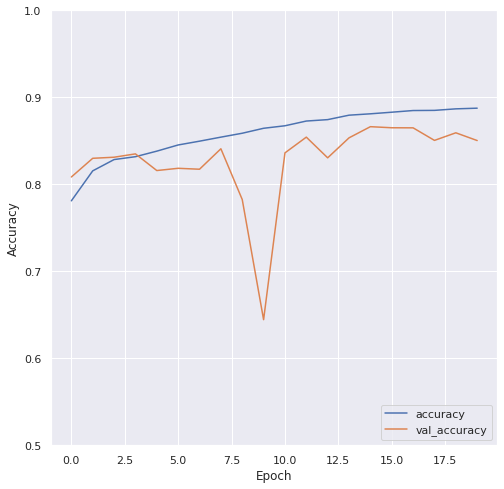

In [84]:
plt.plot(history_CNN.history['accuracy'], label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_CNN.evaluate(x_deep_test, y_deep_test, verbose=2)

Our training and validation score seems close to each other in the end. But on the otherhand, we can see that there is problem with the model at the 9th epoch.

## Training vs Validation Loss

To check overfitting, we are going to observe validation loss and training loss scores. We are going to use history_CNN variable again for this purpose.

351/351 - 13s - loss: 0.3598 - accuracy: 0.8504 - 13s/epoch - 38ms/step


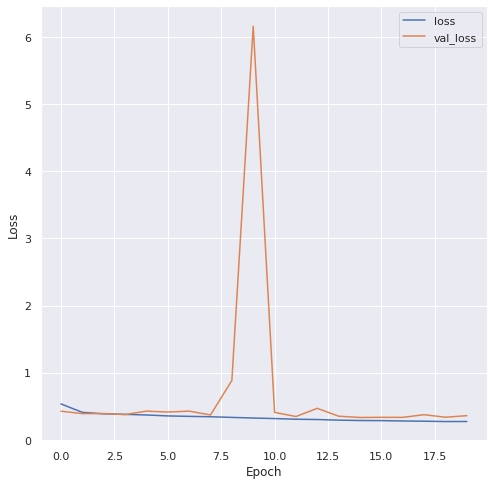

In [85]:
plt.plot(history_CNN.history['loss'], label='loss')
plt.plot(history_CNN.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

test_loss, test_acc = model_CNN.evaluate(x_deep_test, y_deep_test, verbose=2)

Again in the loss graph, we have a huge difference at the end of 9th epoch. But after 9th epoch, both training and validation losses starts to stabelize. 

# Discussion and Conclusion

Our task was to predict a given task if it is a true or fake news. This task is important to avoid misinformation getting through the internet to a lot of people, who will believe and misact because of a fake news. We have created a NLP model using CNN. 

In our pipeline, we started with cleaning our text data from unwanted items such as punctuation, digits etc. Then we removed the stopwords in English which does not carry information about the text. After that, we tokenized our text data and make it suitable as an input to over CNN model. 

In the end of our experiments, we have reached the model provided with the validation accuracty score of 0.8504. This score is not a bad score, but it can be improved. Our model seems like overfit after the 9th epoch, but starts to stabalize after and earlystops at the 20th epoch.

In our task although we had the date data, we didn't use it. An LSTM model can improve our prediction score using the date data. On the other hand, dataset is clear and suitable for this prediction task. 